In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

- id_src: row number of test data
- y: whether or not test example was cancerous
- domain_src: cancer of test example
- domain_tgt: cancer test example is decoded to
- recon_error: reconstruction error of test example
- k: number of nearest neighbors in raw data space
- frac_y_tgt: fraction of nearest neighbors that are cancerous
- frac_domain_tgt: fraction of nearest neighbors in the target domain (domain_tgt)

In [2]:
df = pd.read_csv('NN_df.csv')

In [4]:
df

,Unnamed: 0,id_src,y_src,domain_src,domain_tgt,recon_error,k,frac_y_tgt,frac_domain_tgt
0,0,0,1,acc,brca,0.205359,1,1.00,1.00
1,1,0,1,acc,brca,0.205359,5,1.00,1.00
2,2,0,1,acc,brca,0.205359,10,1.00,1.00
3,3,0,1,acc,brca,0.205359,20,1.00,1.00
4,4,1,1,acc,brca,0.207229,1,1.00,1.00
5,5,1,1,acc,brca,0.207229,5,1.00,1.00
6,6,1,1,acc,brca,0.207229,10,0.90,1.00
7,7,1,1,acc,brca,0.207229,20,0.90,0.95
8,8,2,1,acc,brca,0.215336,1,1.00,1.00
9,9,2,1,acc,brca,0.215336,5,1.00,1.00


In [5]:
# Different K's
df.groupby(['domain_src','k']).agg({'frac_domain_tgt': 'mean'})

frac_domain_tgt
domain_src k                  
acc        1          0.678030
           5          0.654924
           10         0.625000
           20         0.587595
blca       1          0.668449
           5          0.628449
           10         0.601070
           20         0.561979
brca       1          0.659309
           5          0.599127
           10         0.560195
           20         0.513412
cesc       1          0.558162
           5          0.533724
           10         0.517791
           20         0.489516
chol       1          0.676768
           5          0.620875
           10         0.589562
           20         0.531313
coad       1          0.795853
           5          0.740510
           10         0.711404
           20         0.669219
dlbc       1          0.616162
           5          0.520539
           10         0.479125
           20         0.437710
esca       1          0.579643
           5          0.536597
...                        ...
skcm       10         0.613684
           20         0.566683
stad       1          0.670370
           5          0.626936
           10         0.587980
           20         0.540017
tgct       1          0.727273
           5          0.656277
           10         0.615043
           20         0.569481
thca       1          0.631000
           5          0.556879
           10         0.516948
           20         0.473237
thym       1          0.626667
           5          0.597576
           10         0.571394
           20         0.538727
ucec       1          0.732456
           5          0.667384
           10         0.633852
           20         0.587480
ucs        1          0.710744
           5          0.662259
           10         0.625620
           20         0.573140
uvm        1          0.623106
           5          0.616288
           10         0.596212
           20         0.558239

[132 rows x 1 columns]

In [8]:
# Recond error 
df.groupby(['domain_src','domain_tgt']).agg({'recon_error': 'mean'})

recon_error
domain_src domain_tgt             
acc        acc            0.155809
           blca           0.203384
           brca           0.204824
           cesc           0.200521
           chol           0.210951
           coad           0.222080
           dlbc           0.225488
           esca           0.211065
           gbm            0.223295
           hnsc           0.200614
           kich           0.204170
           kirc           0.206311
           kirp           0.208797
           laml           0.248618
           lgg            0.230170
           lihc           0.219585
           luad           0.201692
           lusc           0.198606
           meso           0.219839
           ov             0.217518
           paad           0.204251
           pcpg           0.191338
           prad           0.215939
           read           0.226838
           sarc           0.199797
           skcm           0.210140
           stad           0.210788
           tgct           0.228978
           thca           0.210951
           thym           0.214541
...                            ...
uvm        cesc           0.193059
           chol           0.210270
           coad           0.213032
           dlbc           0.213138
           esca           0.204902
           gbm            0.215325
           hnsc           0.192167
           kich           0.206398
           kirc           0.205735
           kirp           0.198124
           laml           0.230652
           lgg            0.220633
           lihc           0.222498
           luad           0.194682
           lusc           0.191662
           meso           0.209254
           ov             0.213147
           paad           0.199491
           pcpg           0.214789
           prad           0.208259
           read           0.216376
           sarc           0.191960
           skcm           0.151582
           stad           0.201824
           tgct           0.213436
           thca           0.204840
           thym           0.207604
           ucec           0.208306
           ucs            0.200444
           uvm            0.116043

[1089 rows x 1 columns]

In [24]:
# Specific K, each source and target domain
test=df[df.k==20].groupby(['domain_src','domain_tgt']).agg({'frac_domain_tgt': 'mean'})

In [9]:
test

frac_domain_tgt
domain_src domain_tgt                 
acc        acc                 0.85000
           blca                0.23125
           brca                1.00000
           cesc                0.01875
           chol                0.36250
           coad                0.66250
           dlbc                0.41875
           esca                0.02500
           gbm                 0.85000
           hnsc                0.08125
           kich                0.43125
           kirc                0.51250
           kirp                0.79375
           laml                0.75625
           lgg                 0.88125
           lihc                1.00000
           luad                0.57500
           lusc                0.15000
           meso                1.00000
           ov                  0.96250
           paad                0.71250
           pcpg                0.98750
           prad                1.00000
           read                0.39375
           sarc                0.11250
           skcm                0.90000
           stad                0.33125
           tgct                0.74375
           thca                1.00000
           thym                0.90625
...                                ...
uvm        cesc                0.13125
           chol                0.33125
           coad                0.68750
           dlbc                0.41250
           esca                0.04375
           gbm                 0.75000
           hnsc                0.20000
           kich                0.36250
           kirc                0.43750
           kirp                0.83125
           laml                0.44375
           lgg                 0.96250
           lihc                0.98750
           luad                0.46250
           lusc                0.13125
           meso                0.99375
           ov                  1.00000
           paad                0.57500
           pcpg                0.95625
           prad                1.00000
           read                0.41875
           sarc                0.04375
           skcm                0.53125
           stad                0.24375
           tgct                0.68125
           thca                1.00000
           thym                0.80625
           ucec                0.95000
           ucs                 0.17500
           uvm                 0.98750

[1089 rows x 1 columns]

In [25]:

#all the cancer types 
cancers = ['ACC' ,'BLCA', 'BRCA', 'CESC', 'CHOL', 'COAD', 'DLBC', 'ESCA' ,'GBM', 'HNSC', 'KICH',
             'KIRC', 'KIRP', 'LAML', 'LGG' ,'LIHC', 'LUAD', 'LUSC' , 'MESO', 'OV', 'PAAD' ,'PCPG',
             'PRAD', 'READ' ,'SARC' , 'SKCM', 'STAD', 'TGCT', 'THCA', 'THYM', 'UCEC' , 'UCS', 'UVM']
#make them lower case 
cancers = [c.lower() for c in cancers]

data_arr = np.zeros((33,33))

In [26]:
for i in range(len(cancers)):
    for j in range(len(cancers)):
        data_arr[i][j] = test.stack()[cancers[i]][cancers[j]]

In [27]:
heatmap_pd = pd.DataFrame(data_arr, index=cancers, columns=cancers)
heatmap_pd

,acc,blca,brca,cesc,chol,coad,dlbc,esca,gbm,hnsc,...,read,sarc,skcm,stad,tgct,thca,thym,ucec,ucs,uvm
acc,0.868750,0.196875,0.996875,0.031250,0.259375,0.615625,0.318750,0.021875,0.759375,0.059375,...,0.343750,0.078125,0.846875,0.275000,0.609375,1.000000,0.818750,0.825000,0.134375,0.965625
blca,0.564706,0.607647,0.805882,0.531765,0.142941,0.612353,0.416471,0.145882,0.773529,0.381765,...,0.394118,0.061176,0.727647,0.328824,0.808824,0.995294,0.705294,0.827647,0.124118,0.884118
brca,0.524897,0.167695,0.965638,0.120576,0.145473,0.503704,0.319959,0.084156,0.668519,0.205967,...,0.204527,0.022428,0.721605,0.484362,0.634362,0.995473,0.571811,0.535391,0.059671,0.805761
cesc,0.486290,0.275806,0.485484,0.765323,0.128226,0.593548,0.429032,0.134677,0.790323,0.468548,...,0.316129,0.021774,0.487097,0.208871,0.951613,0.990323,0.726613,0.743548,0.075000,0.844355
chol,0.444444,0.166667,1.000000,0.050000,0.416667,0.455556,0.138889,0.055556,0.850000,0.138889,...,0.205556,0.000000,0.716667,0.338889,0.450000,1.000000,0.350000,0.666667,0.050000,0.922222
coad,0.784211,0.756579,0.944737,0.465789,0.161842,0.747368,0.352632,0.157895,0.828947,0.359211,...,0.384211,0.005263,0.905263,0.864474,0.960526,1.000000,0.756579,0.965789,0.196053,0.923684
dlbc,0.377778,0.255556,0.700000,0.277778,0.105556,0.338889,0.738889,0.044444,0.555556,0.177778,...,0.283333,0.116667,0.716667,0.272222,0.966667,0.894444,0.744444,0.583333,0.161111,0.666667
esca,0.269231,0.143590,0.753846,0.302564,0.094872,0.312821,0.184615,0.625641,0.551282,0.457692,...,0.210256,0.024359,0.460256,0.332051,0.860256,0.998718,0.483333,0.479487,0.037179,0.716667
gbm,0.731818,0.104545,0.939394,0.012121,0.275758,0.503030,0.240909,0.021212,0.881818,0.096970,...,0.292424,0.083333,0.845455,0.262121,0.683333,1.000000,0.437879,0.754545,0.168182,0.921212
hnsc,0.292478,0.129646,0.392478,0.329204,0.059735,0.367257,0.228761,0.248673,0.716814,0.811947,...,0.226991,0.013717,0.402212,0.105310,0.670796,0.988938,0.343805,0.407080,0.043805,0.786283


In [12]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

Text(0.5,1,'kNN Target Fraction k=20')

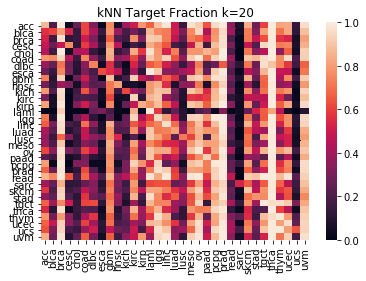

In [29]:
sns.heatmap(heatmap_pd, xticklabels=True, yticklabels=True, annot=False).set_title('kNN Target Fraction k=20')

Text(0.5,1,'Test')